0. Introduction
1. Why those independant variables and their impact on the consumption of fossil energy ? 
2. Linear regression analysis
3. Test of linear model
4. Ridge model
5. Other model
6. Consumption + scenario

# INTRODUCTION #

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly
plotly.offline.init_notebook_mode(connected=True)

file_name = '/home/cj/Bureau/Master2/big-data/03_MILESTONES/belgium_information.csv'  
bel_info = pd.read_csv(file_name)
years = bel_info['Years']
bel_info = bel_info.drop("Years", axis=1)
bel_info.tail()

,population,gdp per capita,Carbon intensity of fossil energy,primary intensity,nuclear consumption,renewable consumption,fossil consumption
34,11159407,47912.767751,2.115786,8.116623e-11,2.897936,0.770421,39.729449
35,11209057,41230.023127,2.141727,9.713328e-11,2.244454,0.863715,41.781945
36,11274196,42225.346541,2.114124,9.773915e-11,3.742304,0.861393,41.925691
37,11331422,44390.236671,2.086355,9.225532e-11,3.630868,0.962683,41.811288
38,11375158,47714.598083,2.141179,8.528568e-11,2.458899,1.098366,42.732485


In [2]:
file_name = '/home/cj/Bureau/Master2/big-data/03_MILESTONES/energy_emission_bel.csv'
bel_emi = pd.read_csv(file_name)
years = bel_emi['Years']
bel_emi = bel_emi.drop("Years", axis=1)
bel_emi.tail()

,CO2 gas,CO2 coal,CO2 oil,CO2 nuclear,CO2 wind,CO2 solar,CO2 hydro,CO2 fossil,CO2 renewable,CO2 primary
34,27.885880,12.211840,43.961300,0.539248,0.055380,0.132618,0.067252,84.059020,0.255250,84.853518
35,30.392254,12.295170,46.798093,0.417648,0.066888,0.140438,0.065228,89.485517,0.272554,90.175719
36,31.329701,11.619851,45.686551,0.696368,0.065244,0.142232,0.068494,88.636103,0.275970,89.608441
37,31.557916,11.398655,44.276616,0.675632,0.078132,0.151248,0.064262,87.233187,0.293642,88.202461
38,32.437073,15.399153,43.661663,0.457552,0.089988,0.182712,0.059938,91.497890,0.332638,92.288080


In [3]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

years = list()
for i in range(39) : years.append(1980+i)

# Initialize figure with subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("Belgian consumption of primary energies",
                                    "Belgian CO2 emission due to primary energies "))

# Add traces
fig.add_trace(go.Scatter(x=years, y=bel_info['fossil consumption'], opacity=0.8, line=dict(color="Red"),
                         showlegend=False), row=1, col=1)

fig.add_trace(go.Scatter(x=years, y=bel_info['renewable consumption'], opacity=0.8, line=dict(color="Blue"),
                         showlegend=False), row=1, col=1)

fig.add_trace(go.Scatter(x=years, y=bel_info['nuclear consumption'], opacity=0.8, line=dict(color="Green"),
                        showlegend=False), row=1, col=1)

fig.add_trace(go.Scatter( x=years, y=bel_emi['CO2 fossil'], name="Fossil energy", opacity=0.8,
                         line=dict(color="Red")), row=1, col=2)

fig.add_trace(go.Scatter( x=years, y=bel_emi['CO2 renewable'], name="Renewable energy", opacity=0.8,
                         line=dict(color="Blue")), row=1, col=2)

fig.add_trace(go.Scatter( x=years, y=bel_emi['CO2 nuclear'], name="Nuclear energy", opacity=0.8,
                         line=dict(color="Green")), row=1, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="", row=1, col=1)
fig.update_xaxes(title_text="", row=1, col=1)
fig.update_xaxes(title_text="", row=1, col=1)

fig.update_xaxes(title_text="", row=1, col=2)
fig.update_xaxes(title_text="", row=1, col=2)
fig.update_xaxes(title_text="", row=1, col=2)


# Update yaxis properties
fig.update_yaxes(title_text="Consumption [Mt CO2]", row=1, col=1)
fig.update_yaxes(title_text="Consumption [Mt CO2]", row=1, col=1)
fig.update_yaxes(title_text="Consumption [Mt CO2]", row=1, col=1)

fig.update_yaxes(title_text="Emission [Mtoe]", row=1, col=2)
fig.update_yaxes(title_text="Emission [Mtoe]", row=1, col=2)
fig.update_yaxes(title_text="Emission [Mtoe]", row=1, col=2)


# Update title and height
fig.update_layout(title_text="",
                  height=400, width=1000, showlegend=True)
fig.update_layout(legend_orientation="h")

fig.show()

In [4]:
co2_coeff = [bel_emi['CO2 fossil'][38]/bel_info['fossil consumption'][38],
             bel_emi['CO2 renewable'][38]/bel_info['renewable consumption'][38],
             bel_emi['CO2 nuclear'][38]/bel_info['nuclear consumption'][38]]

energies = ['Fossil energy', 'Renewable energy', 'Nuclear energy']
text = [2.14, 0.31, 0.18]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=energies,
    y=co2_coeff,
    name="Consumption of energy [Mtoe]", 
    text=text,
    marker_color = ['Red', 'Blue', 'Green'],
    textposition='auto'
))

fig.update_yaxes(title_text="Mt CO2 / Mtoe")

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group',
                  xaxis_tickangle=-0, title_text="Emission of CO2 per unity of energy consumed in Belgium in 2018")
fig.show()

# Why those independant variables and their impact on the consumption of fossil energy ? #

In [5]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly
plotly.offline.init_notebook_mode(connected=True)

years = list()
for i in range(39) : years.append(1980+i)

# Initialize figure with subplots
fig = make_subplots(
    rows=3, cols=3, subplot_titles=("Belgian population", "Belgian gdp per capita",
                                    "Belgian carbon intensity of fossil energy",
                                    "Belgian primary energy intensity",
                                    "Nuclear energy consumption",
                                    "Renewable energy consumption",
                                    "", "Fossil energy consumption"
                                    ))


# Add traces
fig.add_trace(go.Scatter(x=years, y=bel_info['population']), row=1, col=1)
fig.add_trace(go.Scatter(x=years, y=bel_info['gdp per capita']), row=1, col=2)
fig.add_trace(go.Scatter(x=years, y=bel_info['Carbon intensity of fossil energy']), row=1, col=3)
fig.add_trace(go.Scatter(x=years, y=bel_info['primary intensity']), row=2, col=1)
fig.add_trace(go.Scatter(x=years, y=bel_info['nuclear consumption']), row=2, col=2)
fig.add_trace(go.Scatter(x=years, y=bel_info['renewable consumption']), row=2, col=3)
fig.add_trace(go.Scatter(x=years, y=bel_info['fossil consumption']), row=3, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="Years", row=1, col=1)
fig.update_xaxes(title_text="Years", row=1, col=2)
fig.update_xaxes(title_text="Years", row=1, col=3)
fig.update_xaxes(title_text="Years", row=2, col=1)
fig.update_xaxes(title_text="Years", row=2, col=2)
fig.update_xaxes(title_text="Years", row=2, col=3)
fig.update_xaxes(title_text="Years", row=3, col=2)

"""
# Update yaxis properties
fig.update_yaxes(title_text="Population", row=1, col=1)
fig.update_yaxes(title_text="Gdp per capita", row=1, col=2)
fig.update_yaxes(title_text="Carbon intensity of fossil energy", row=1, col=3)
fig.update_yaxes(title_text="Primary energy intensity", row=2, col=1)
"""
fig.update_yaxes(title_text="Mtoe", row=2, col=2)
fig.update_yaxes(title_text="Mtoe", row=2, col=3)
fig.update_yaxes(title_text="Mtoe", row=3, col=2)


# Update title and height
fig.update_layout(title_text="", height=800, width=1000, showlegend=False)

fig.show()

The first model we are going to use to forecast the consumption of fossil energy is the famous linear regression. We used the LinearRegression function of scikit-learn. This version uses ordinary least square (the maximum likelyhood estimator) in order to estimate the coefficients of the unknown parameters in a linear regression model. The goal is to minimize the sum of squared difference of distances between the data points of the observed dependant variables and those predicted by the regression line. So we need to solve an optimization problem. 

The Gauss-Markov Theorem is telling us that the least squares estimator for the coefficients β is unbiased and has minimum variance among all unbiased linear estimators, given that we fulfill all Gauss-Markov assumptions.
Those assumptions are the following :

1. **Linear relationship**
    - This model needs linear relationship between the independant variables and the dependant variable. You can verify this assumption by ploting a scatter plot for each independnt variable in function of the dependant variable. It is also necessary to check for outliers. Indeed, linear regression is sensitive to outliers effect Have to work on the outliers and explain. Why linear relationship is important ?
    
    
2. **Error terms should be normally distributed.**
    - 
  
  
3. **No or little multicollinearity**
    - Multicolinearity occurs when there exists near-linear reliationships among independant variables, in other word when independant variables are too highly correlated with each other. In a case of multicolinearity, least square estimates are unbiased, but their variance are large and so those coefficients might be far from the true value. (During the resolution of the optimization problem, it is possible that some divisions by zero occur which leads to the abortion of this division. When multicolinearity exists, those division are not aborted because the divider is very small. Those very small quantities distord the results.) Multicolinearity can come from the model choice, so the choice of independant variables.
    
    - What happen if auto-correlation is not respected ?
        1. It reduces the precision of the estimators of OSL.
    
    - How to detect multicolinearity ? 
        1. Pairwise scatter plots between independant variables or correlation matrix. But it might be difficult to look for multicolinearity looking at two variables at a time. 
        2. Consider the variance inflation factors (VIFs). VIFs over 10 indicates multicolinearity variables.
        3. Investigate the sign of the regression coefficients. Variables whose regression coefficient are opposite in sign of what you would expect may indicate multicolinearity.

    - How to correct multicolinearity ?
        1. Variable selection techniques (remove one the two variables)
        2. Ridge regression
        

4. **No auto-correlation between the residuals**

    Autocorrelation occurs when the residuals are not independent from each other. So when the observation of an error term can predict the next observation.
    
    - What happen if auto-correlation is not respected ?
        1. It reduces the precision of the estimators of OSL.
    
    - How to detect auto-correlation ?
        1. Plot the scatter plot of each variable in function of the residuals. We check if the data are well distributed without any specific pattern, if this is the case then there is no auto-correlation between each variables.
     
     - How can we fixe autocorrelation problem ?
        1. If there is any independant variable explaining the allows to predict the error term for an observation, then this variable need to be added to the model.
        
5. **Homoscedasticity of the residuals**

    Litteraly homoscedasticity means "to have the same scatter". In terms of data, it indicates that data are spread out to about the same extent. It is a situation in which the error term, the residuals, is the same for all values of the set of independant variables.
   
    - What can happen if homoscedasticity is not respected ?
         1. Heteroscedasticity reduces the precision of the estimates in OLS linear regression.
     
    - How to detect homoscedasticity of the residuals ? 
         1. Plot the residuals in function of the predicted values. 
     
    - How can we fix homoscedasticity ?
    
    
6. **Sample size rule of thumb**


## Regression analysis ##

### Linear relationship ###

In [6]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

years = list()
for i in range(39) : years.append(1980+i)

# Initialize figure with subplots
fig = make_subplots(
    rows=3, cols=3
)

# Add traces
fig.add_trace(go.Scatter(y=bel_info['fossil consumption'], x=bel_info['population'], mode='markers'), row=1, col=1)
fig.add_trace(go.Scatter(y=bel_info['fossil consumption'], x=bel_info['gdp per capita'], mode='markers'), row=1, col=2)
fig.add_trace(go.Scatter(y=bel_info['fossil consumption'], x=bel_info['Carbon intensity of fossil energy'], mode='markers'), row=1, col=3)
fig.add_trace(go.Scatter(y=bel_info['fossil consumption'], x=bel_info['primary intensity'], mode='markers'), row=2, col=1)
fig.add_trace(go.Scatter(y=bel_info['fossil consumption'], x=bel_info['nuclear consumption'], mode='markers'), row=2, col=2)
fig.add_trace(go.Scatter(y=bel_info['fossil consumption'], x=bel_info['renewable consumption'], mode='markers'), row=2, col=3)

# Update xaxis properties
fig.update_xaxes(title_text="population", row=1, col=1)
fig.update_xaxes(title_text="gdp per capita", row=1, col=2)
fig.update_xaxes(title_text="carbon intensity of fossil energy", row=1, col=3)
fig.update_xaxes(title_text="primary intensity", row=2, col=1)
fig.update_xaxes(title_text="nuclear consumption", row=2, col=2)
fig.update_xaxes(title_text="renewable consumption", row=2, col=3)


# Update yaxis properties
fig.update_yaxes(title_text="fossil consumption", row=1, col=1)
fig.update_yaxes(title_text="fossil consumption", row=1, col=2)
fig.update_yaxes(title_text="fossil consumption", row=1, col=3)
fig.update_yaxes(title_text="fossil consumption", row=2, col=1)
fig.update_yaxes(title_text="fossil consumption", row=2, col=2)
fig.update_yaxes(title_text="fossil consumption", row=2, col=3)


# Update title and height
fig.update_layout(title_text="Scatter plots of fossil consumption in function of the independant variables", height=800, width=1000, showlegend=False)

fig.show()

## Multivariate normality ##

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# plot
f, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=False)
sns.distplot( bel_info['population'] , color="skyblue", ax=axes[0, 0])
sns.distplot( bel_info['gdp per capita'] , color="olive", ax=axes[0, 1])
sns.distplot( bel_info['Carbon intensity of fossil energy'] , color="gold", ax=axes[0, 2])
sns.distplot( bel_info['primary intensity'] , color="teal", ax=axes[1, 0])
sns.distplot( bel_info['nuclear consumption'] , color="orange", ax=axes[1, 1])
sns.distplot( bel_info['renewable consumption'] , color="purple", ax=axes[1, 2])
sns.distplot( bel_info['fossil consumption'] , color="red", ax=axes[2, 1])

f.delaxes(axes[-1,-1])
f.delaxes(axes[-1,-3])

f.tight_layout(pad=3.0)

file_name = '/home/cj/Images' 
plt.savefig(file_name)

plt.show()

<Figure size 1200x1200 with 7 Axes>

## No or little multicollinearity ##

#### Go see the R code ####

In [8]:
corr = bel_info.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,population,gdp per capita,Carbon intensity of fossil energy,primary intensity,nuclear consumption,renewable consumption,fossil consumption
population,1,0.91,-0.94,-0.78,0.23,0.94,0.64
gdp per capita,0.91,1,-0.97,-0.92,0.47,0.75,0.79
Carbon intensity of fossil energy,-0.94,-0.97,1,0.89,-0.49,-0.78,-0.81
primary intensity,-0.78,-0.92,0.89,1,-0.65,-0.64,-0.8
nuclear consumption,0.23,0.47,-0.49,-0.65,1,0.037,0.55
renewable consumption,0.94,0.75,-0.78,-0.64,0.037,1,0.44
fossil consumption,0.64,0.79,-0.81,-0.8,0.55,0.44,1


#### We can use the VIFs value but no need to ####

## Standardization ##

In [9]:
from sklearn import preprocessing

# Get column names first
names = bel_info.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_data = scaler.fit_transform(bel_info)
scaled_bel_info = pd.DataFrame(scaled_data, columns=names)
scaled_bel_info.tail()

,population,gdp per capita,Carbon intensity of fossil energy,primary intensity,nuclear consumption,renewable consumption,fossil consumption
34,1.647450,1.439184,-1.334703,-1.089140,-0.576093,1.782205,0.003364
35,1.749318,0.936781,-1.266272,-0.923915,-1.327321,2.094100,0.501840
36,1.882965,1.011608,-1.339089,-0.917645,0.394572,2.086339,0.536751
37,2.000377,1.174363,-1.412343,-0.974391,0.266468,2.424968,0.508966
38,2.090111,1.424285,-1.267718,-1.046512,-1.080800,2.878581,0.732691


In [10]:
def model_forecast(data, model):
    
    data =data.to_numpy()
    a = 39-12 ; b = 39
    
    x_train = data[:,0:6][0:a]; y_train = data[:,6:7][0:a]
    x_test = data[:,0:6][a:b]; y_test = data[:,6:7][a:b]
    
    model.fit(x_train, y_train)
    predicted = mlr.predict(x_train)
    
    y_train = np.resize(data[:,6:7], (1,a))[0]
    y_train = pd.Series(y_train)
    
    predicted = np.resize(predicted, (1,len(predicted)))[0]
    predicted = pd.Series(predicted)

    residuals = predicted-y_train
    
    return model
     

## Linear regression ##

In [11]:
from matplotlib import pyplot
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Create linear regression object.
mlr= LinearRegression()

data = scaled_bel_info.to_numpy()

a = 39-12 ; b = 39

x_train = data[:,0:6][0:a]
y_train = data[:,6:7][0:a]

x_test = data[:,0:6][a:b]
y_test = data[:,6:7][a:b]

# Fit linear regression.
mlr.fit(x_train, y_train)

# Get the slope and intercept of the line best fit.
print(mlr.intercept_)
print(mlr.coef_)

predicted = mlr.predict(x_train)

y_train = np.resize(data[:,6:7], (1,a))[0]
y_train = pd.Series(y_train)
predicted = np.resize(predicted, (1,len(predicted)))[0]
predicted = pd.Series(predicted)

residuals = predicted-y_train

[1.50186316]
[[ 0.24964305 -1.01133611 -1.43631931 -0.74501876 -0.6258793   2.17469961]]


## No auto-correlation between the residuals ##

In [12]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

years = list()
for i in range(39) : years.append(1980+i)

# Initialize figure with subplots
fig = make_subplots(
    rows=3, cols=3
)

# Add traces
fig.add_trace(go.Scatter(y=residuals, x=scaled_bel_info['population'], mode='markers'), row=1, col=1)
fig.add_trace(go.Scatter(y=residuals, x=scaled_bel_info['gdp per capita'], mode='markers'), row=1, col=2)
fig.add_trace(go.Scatter(y=residuals, x=scaled_bel_info['Carbon intensity of fossil energy'], mode='markers'), row=1, col=3)
fig.add_trace(go.Scatter(y=residuals, x=scaled_bel_info['primary intensity'], mode='markers'), row=2, col=1)
fig.add_trace(go.Scatter(y=residuals, x=scaled_bel_info['nuclear consumption'], mode='markers'), row=2, col=2)
fig.add_trace(go.Scatter(y=residuals, x=scaled_bel_info['renewable consumption'], mode='markers'), row=2, col=3)

# Update xaxis properties
fig.update_xaxes(title_text="population", row=1, col=1)
fig.update_xaxes(title_text="gdp per capita", row=1, col=2)
fig.update_xaxes(title_text="carbon intensity of fossil energy", row=1, col=3)
fig.update_xaxes(title_text="primary intensity", row=2, col=1)
fig.update_xaxes(title_text="nuclear consumption", row=2, col=2)
fig.update_xaxes(title_text="renewable consumption", row=2, col=3)


# Update yaxis properties
fig.update_yaxes(title_text="residuals", row=1, col=1)
fig.update_yaxes(title_text="residuals", row=1, col=2)
fig.update_yaxes(title_text="residuals", row=1, col=3)
fig.update_yaxes(title_text="residuals", row=2, col=1)
fig.update_yaxes(title_text="residuals", row=2, col=2)
fig.update_yaxes(title_text="residuals", row=2, col=3)


# Update title and height
fig.update_layout(title_text="Scatter plots of residuals in function of the independant variables", height=800, width=1000, showlegend=False)

fig.show()

# Error normally distributed #

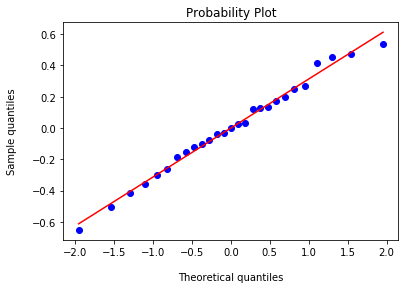

In [15]:
from scipy import stats
fig = plt.figure()
ax = fig.add_subplot(111)

#res = stats.probplot(residuals)
#ax.set_title("ta mere")

stats.probplot(residuals, dist="norm", fit=True, plot=plt)
plt.xlabel("Theoretical quantiles", labelpad=15)
plt.ylabel("Sample quantiles", labelpad=15)
#"Probability Plot to Compare the residuals to a perfectly normal distribution"
file_name = "/home/cj/Images/milestone 3/prob_plot"
plt.savefig(file_name)
plt.show()

## Homoscedasticity of the residuals ##

In [17]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

years = list()
for i in range(39) : years.append(1980+i)

# Initialize figure with subplots
fig = make_subplots(rows=1, cols=1)

# Add traces
fig.add_trace(go.Scatter(y=residuals, x=predicted, mode='markers'), row=1, col=1)


# Update xaxis properties
fig.update_xaxes(title_text="fitted values", row=1, col=1)


# Update yaxis properties
fig.update_yaxes(title_text="residuals", row=1, col=1)


# Update title and height
fig.update_layout(title_text="Scatter plots of residuals in function of the fitted values",
                  height=500, width=500, showlegend=False)

fig.show()

In [18]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

years = list()
for i in range(39) : years.append(1980+i)

# Initialize figure with subplots
fig = make_subplots(rows=1, cols=1)

# Add traces
fig.add_trace(go.Scatter(y=residuals, x=years, mode='markers'), row=1, col=1)


# Update xaxis properties
fig.update_xaxes(title_text="Years", row=1, col=1)


# Update yaxis properties
fig.update_yaxes(title_text="residuals", row=1, col=1)


# Update title and height
fig.update_layout(title_text="Scatter plots of residuals in function of the fitted values",
                  height=500, width=500, showlegend=False)

fig.show()

# Prediction #

In [19]:
y_train = np.resize(data[:,6:7], (1,b))[0]
y_train = pd.Series(y_train)
predicted = np.resize(predicted, (1,len(predicted)))[0]
predict = pd.Series(predicted)

predicted_test = mlr.predict(x_test)

total = np.concatenate((predicted, predicted_test), axis=None)
total

array([-0.80319213, -0.69435587, -1.20818352, -1.3979897 , -1.85509032,
       -2.05381141, -1.79020736, -1.39265091, -1.40008294, -1.11319562,
       -0.66838863, -0.71649915, -0.46245903, -0.30571202,  0.01140289,
        0.08139961,  0.0805782 ,  0.10456292,  0.34603229,  0.32469075,
        0.60021846,  0.54330255,  1.07474083,  0.83152152,  0.98868261,
        1.16773008,  1.38922937,  1.59982126,  1.80224134,  2.30760553,
        2.81811431,  3.76642714,  5.47362997,  6.17584094,  7.4224556 ,
        8.88305431,  7.84608444,  8.67488364, 10.12023129])

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=years[a:b],
                y=total[a:b],
                name="Fitted (with least square regression)",
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=years[a:b],
                y=y_train[a:b],
                name="Real",
                opacity=0.8))


# Use date string to set xaxis range
fig.update_layout(title_text="Consumption of fossil energy")
                  

fig.update_xaxes(title_text="Years")
fig.update_yaxes(title_text="Consumption [Mtoe]"),
fig.update_layout(legend_orientation="h")
fig.show()

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=years[a:b],
                y=(total[a:b]-y_train[a:b])**2,
                name="Fitted (with least square regression)",
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(title_text="")
                  

fig.update_xaxes(title_text="Years")
fig.update_yaxes(title_text="Square of residuals"),
fig.update_layout(legend_orientation="h")
fig.show()

In [22]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

years = list()
for i in range(39) : years.append(1980+i)

# Initialize figure with subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("Fossil consumption between 1980 and 2006",
                                    "Fossil consumption between 2006 and 2018"))

# Add traces

fig.add_trace(go.Scatter(x=years[0:a], y=total[0:a], opacity=0.8, line=dict(color="Red"), showlegend=False),
              row=1, col=1)
fig.add_trace(go.Scatter(x=years[0:a], y=y_train[0:a], opacity=0.8, line=dict(color="Green"), showlegend=False),
              row=1, col=1)


fig.add_trace(go.Scatter(x=years[a:b], y=total[a:b], opacity=0.8, line=dict(color="Red"),
                         name = "Linear regression"),row=1, col=2)
fig.add_trace(go.Scatter(x=years[a:b], y=y_train[a:b], opacity=0.8, line=dict(color="Green"),
                         name = "Observed values"), row=1, col=2)


# Update xaxis properties
fig.update_xaxes(title_text="", row=1, col=1)
fig.update_xaxes(title_text="", row=1, col=2)


# Update yaxis properties
fig.update_yaxes(title_text="Consumption [Mtoe]", row=1, col=1)


fig.update_yaxes(title_text="Consumption [Mtoe]", row=1, col=2)



# Update title and height
fig.update_layout(title_text="",
                  height=400, width=1000, showlegend=True)
fig.update_layout(legend_orientation="h")

fig.show()

## Plotly plot ##

In [23]:
# list of colors
list_colors = ['Black', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
               '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '17becf']
a = 39-12
b = 39

def fig_init():

    # Initialize figure with subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=("Fossil consumption between 1980 and 2006",
                                                        "Fossil consumption between 2006 and 2018"))

    # Update xaxis properties
    fig.update_xaxes(title_text="", row=1, col=1)
    fig.update_xaxes(title_text="", row=1, col=2)


    # Update yaxis properties
    fig.update_yaxes(title_text="Consumption [Mtoe]", row=1, col=1)


    fig.update_yaxes(title_text="Consumption [Mtoe]", row=1, col=2)

    # Update title and height
    fig.update_layout(title_text="",
                      height=400, width=1000, showlegend=True)
    fig.update_layout(legend_orientation="h")
    
    return fig

def plotly_plot(fig, y_train_predict, y_test_predict, name_model, color_name):
    
    for i in range(len(name_model)):
    
        train_predict = np.resize(y_train_predict[i], (1,len(y_train_predict[i])))[0]
        train_predict = pd.Series(train_predict)
    
        fig.add_trace(go.Scatter(x=years[0:a], y=train_predict, opacity=0.8, line=dict(color=color_name[i]),
                                 showlegend=False), row=1, col=1)
                                 
        test_predict = np.resize(y_test_predict[i], (1,len(y_test_predict[i])))[0]
        test_predict = pd.Series(test_predict)
                      
        fig.add_trace(go.Scatter(x=years[a:b], y=test_predict, opacity=0.8, line=dict(color=color_name[i]),
                                 name = name_model[i]),row=1, col=2)

    fig.show()
    
def plotly_train(y_train_predict, name_model, color_name):
    
    fig = go.Figure()
    
    for i in range(len(name_model)):
        
        train_predict = np.resize(y_train_predict[i], (1,len(y_train_predict[i])))[0]
        train_predict = pd.Series(train_predict)
    
        fig.add_trace(go.Scatter(x=years[0:a], y=train_predict, opacity=0.8, line=dict(color=color_name[i]),
                                     name = name_model[i]))

    # Use date string to set xaxis range
    fig.update_layout(title_text="Consumption of fossil energy between 1980 and 2006")


    fig.update_xaxes(title_text="Years")
    fig.update_yaxes(title_text="Consumption [Mtoe]"),
    #fig.update_layout(legend_orientation="h")
    fig.show()

        
def plotly_test(y_test_predict, name_model, color_name):
    
    fig = go.Figure()
    
    for i in range(len(name_model)):
        
        test_predict = np.resize(y_test_predict[i], (1,len(y_test_predict[i])))[0]
        test_predict = pd.Series(test_predict)
    
        fig.add_trace(go.Scatter(x=years[a:b], y=test_predict, opacity=0.8, line=dict(color=color_name[i]),
                                     name = name_model[i]))

    # Use date string to set xaxis range
    fig.update_layout(title_text="Consumption of fossil energy between 2007 and 2018")


    fig.update_xaxes(title_text="Years")
    fig.update_yaxes(title_text="Consumption [Mtoe]"),
    #fig.update_layout(legend_orientation="h")
    fig.show()
    
def plot_evaluation(y_test, y_test_predict, name_model, color_name):
    
    fig = go.Figure()
    
    y_test = np.resize(y_test, (1,len(y_test)))[0]
    y_test = pd.Series(y_test)
    
    for i in range(len(name_model)):
        
        test_predict = np.resize(y_test_predict[i], (1,len(y_test_predict[i])))[0]
        test_predict = pd.Series(test_predict)
        
        fig.add_trace(go.Scatter(x=years[a:b], y=(test_predict-y_test)*(test_predict-y_test), name=name_model[i],
                                 opacity=0.8, line=dict(color=color_name[i])))

    # Use date string to set xaxis range
    fig.update_layout(title_text="Evaluation of the models")

    fig.update_xaxes(title_text="Years")
    fig.update_yaxes(title_text="Square of residuals [Mtoe^2]"),
    #fig.update_layout(legend_orientation="h")
    fig.show()

## Polynomial regression model ##

In [24]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import math  

def model_poly(data, degree):
    
    data = data.to_numpy()

    a = 39-12 ; b = 39

    x_train = data[:,0:6][0:a]
    y_train = data[:,6:7][0:a]

    x_test = data[:,0:6][a:b]
    y_test = data[:,6:7][a:b]
    
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(x_train, y_train)
    
    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)
    
    return [y_train, y_train_predict, y_test, y_test_predict, model]

def evaluation_model(y_true, y_pred):
    list_pred = list()
    
    y_true = list(np.resize(y_true, (1,len(y_true)))[0])
    
    for i in range(len(y_pred)):
        pred = list(np.resize(y_pred[i], (1,len(y_pred[i])))[0])
        list_pred.append(math.sqrt(mean_squared_error(y_true, pred)))
    
    return list_pred


res = model_poly(scaled_bel_info, 2)
res1 = model_poly(scaled_bel_info, 3)
res2 = model_poly(scaled_bel_info, 4)

In [27]:
name_model = ["real", "reg lin", "poly deg 2", "poly deg 3", "poly deg 4"]
color_name = [list_colors[0], list_colors[1], list_colors[2], list_colors[3], list_colors[4]]
y_train_predict = [res[0], total[0:a], res[1], res1[1], res2[1]]
y_test_predict = [res[2], total[a:b], res[3], res1[3], res2[3]]
fig_poly = fig_init()
plotly_plot(fig_poly, y_train_predict, y_test_predict, name_model, color_name)

print(evaluation_model(y_test_predict[0], y_test_predict[1:5]))

#plotly_train(y_train_predict, name_model, color_name)
#plotly_test(y_test_predict, name_model, color_name)
plot_evaluation(res[2], y_test_predict[1:5], name_model[1:5], color_name[1:5])

[5.814178390938035, 1.4030365819753283, 1.0037617802269863, 0.5626981315837304]


## SVR and kernel ridge Model ##

In [54]:
def model_svr(data, model):
    
    data = data.to_numpy()

    a = 39-12 ; b = 39

    x_train = data[:,0:6][0:a]
    y_train = data[:,6:7][0:a]

    x_test = data[:,0:6][a:b]
    y_test = data[:,6:7][a:b]
    
    model.fit(x_train, y_train.ravel())
    
    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)
    
    return [y_train, y_train_predict, y_test, y_test_predict, model]

In [55]:
import numpy as np
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1),
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

In [56]:
#svr1 = model_svr(scaled_bel_info, svr_rbf)
#svr3 = model_svr(scaled_bel_info, svr_poly)
kr1 = model_svr(scaled_bel_info, kr)

/home/cj/anaconda3/envs/rstudio/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



In [50]:
name_model = ["real", "svr rbf", "svr poly", "kernel"]
color_name = [list_colors[0], list_colors[1], list_colors[2], list_colors[3]]
y_train_predict = [svr1[0], svr1[1], svr3[1], kr1[1]]
y_test_predict = [svr1[2], svr1[3], svr3[3], kr1[3]]
fig_poly = fig_init()
plotly_plot(fig_poly, y_train_predict, y_test_predict, name_model, color_name)

print(evaluation_model(y_test_predict[0], y_test_predict[1:4]))

plotly_train(y_train_predict, name_model, color_name)
plotly_test(y_test_predict, name_model, color_name)
plot_evaluation(res[2], y_test_predict[1:4], name_model[1:4], color_name[1:4])

[1.0919706422766715, 1.0427786716759917, 0.36164181736314716]


In [57]:
import statistics 
from statistics import stdev
import math

def descaled(data_scaled, mu, teta):
    y_descaled = list()
    for i in range(len(data_scaled)):
        y = data_scaled[i]
        for i in range(len(y)): y[i] = y[i]*teta+mu
        y_descaled.append(y)
        
    return y_descaled

mu = scaler.mean_[6]
teta = math.sqrt(scaler.var_[6])

scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_data = scaler.fit_transform(bel_info)
scaled_bel_info = pd.DataFrame(scaled_data, columns=names)

svr1 = model_svr(scaled_bel_info, svr_rbf)
svr3 = model_svr(scaled_bel_info, svr_poly)
kr1 = model_svr(scaled_bel_info, kr)

y_train_pred = [res[0], total[0:a], res[1], res1[1], res2[1]]
y_test_pred = [res[2], total[a:b], res[3], res1[3], res2[3]]

y_train_descaled = descaled(y_train_pred, mu, teta)
y_test_descaled = descaled(y_test_pred, mu, teta)

/home/cj/anaconda3/envs/rstudio/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



In [58]:
name_model = ["real", "reg lin", "poly deg 2", "poly deg 3", "poly deg 4"]
color_name = [list_colors[0], list_colors[1], list_colors[2], list_colors[3], list_colors[4]]
fig_poly = fig_init()

plotly_train(y_train_descaled, name_model, color_name)
plotly_test(y_test_descaled, name_model, color_name)
plot_evaluation(res[2], y_test_pred[1:5], name_model[1:5], color_name[1:5])

In [60]:
import statistics 
from statistics import stdev
import math

def descaled(data_scaled, mu, teta):
    y_descaled = list()
    for i in range(len(data_scaled)):
        y = data_scaled[i]
        for i in range(len(y)): y[i] = y[i]*teta+mu
        y_descaled.append(y)
        
    return y_descaled

mu = scaler.mean_[6]
teta = math.sqrt(scaler.var_[6])

scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_data = scaler.fit_transform(bel_info)
scaled_bel_info = pd.DataFrame(scaled_data, columns=names)

svr1 = model_svr(scaled_bel_info, svr_rbf)
svr3 = model_svr(scaled_bel_info, svr_poly)
kr1 = model_svr(scaled_bel_info, kr)

y_train_pred = [svr1[0], svr1[1], svr3[1], kr1[1]]
y_test_pred = [svr1[2], svr1[3], svr3[3], kr1[3]]

y_train_descaled = descaled(y_train_pred, mu, teta)
y_test_descaled = descaled(y_test_pred, mu, teta)

/home/cj/anaconda3/envs/rstudio/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



In [61]:
name_model = ["real", "svr rbf", "svr poly", "kernel"]
color_name = [list_colors[0], list_colors[1], list_colors[2], list_colors[3]]
fig_poly = fig_init()
#plotly_plot(fig_poly, y_train_predict, y_test_predict, name_model, color_name)

print(evaluation_model(y_test_predict[0], y_test_predict[1:4]))

plotly_train(y_train_descaled, name_model, color_name)
plotly_test(y_test_descaled, name_model, color_name)
plot_evaluation(res[2], y_test_descaled[1:4], name_model[1:4], color_name[1:4])

[1.0919706422766715, 1.0427786716759917, 0.36164181736314716]


## Scenario based Forecasting ##

In [62]:
bel_info.tail()

,population,gdp per capita,Carbon intensity of fossil energy,primary intensity,nuclear consumption,renewable consumption,fossil consumption
34,11159407,47912.767751,2.115786,8.116623e-11,2.897936,0.770421,39.729449
35,11209057,41230.023127,2.141727,9.713328e-11,2.244454,0.863715,41.781945
36,11274196,42225.346541,2.114124,9.773915e-11,3.742304,0.861393,41.925691
37,11331422,44390.236671,2.086355,9.225532e-11,3.630868,0.962683,41.811288
38,11375158,47714.598083,2.141179,8.528568e-11,2.458899,1.098366,42.732485


In [63]:
file_name = '/home/cj/Bureau/Master2/scenario/sc_0.0_0.0_0.0_0.0_0.0_0.0.csv'  
sc1 = pd.read_csv(file_name)
sc1 = sc1.drop("Unnamed: 0", axis=1) 

file_name = '/home/cj/Bureau/Master2/scenario/sc_0.0_0.0_0.0_0.0_0.1_0.0.csv' 
sc2 = pd.read_csv(file_name)
sc2 = sc2.drop("Unnamed: 0", axis=1)

file_name = '/home/cj/Bureau/Master2/scenario/sc_0.0_-0.02_0.0002_0.002_-0.1_0.1.csv' 
sc3 = pd.read_csv(file_name)
sc3 = sc3.drop("Unnamed: 0", axis=1) 
sc3.tail()

,population,gdp per capita,Carbon intensity of fossil energy,primary intensity,nuclear consumption,renewable consumption
8,11375158.0,40080.262390,1.010250,0.000986,0.49178,1.977059
9,11375158.0,39125.970428,1.010452,0.000988,0.24589,2.086896
10,11375158.0,38171.678467,1.010653,0.000990,0.00000,2.196733
11,11375158.0,37217.386505,1.010855,0.000991,0.00000,2.306569
12,11375158.0,36263.094543,1.011057,0.000993,0.00000,2.416406


In [64]:
#kr1 # kernel based
#res2 # poly2

In [65]:
def plotly_total(y_train_predict, name_model, color_name):
    
    years = list()
    for i in range(51) : years.append(1980+i)
    
    fig = go.Figure()
    
    for i in range(len(name_model)):
        
        train_predict = np.resize(y_train_predict[i], (1,len(y_train_predict[i])))[0]
        train_predict = pd.Series(train_predict)
    
        fig.add_trace(go.Scatter(x=years, y=train_predict, opacity=0.8, line=dict(color=color_name[i]),
                                     name = name_model[i]))

    # Use date string to set xaxis range
    fig.update_layout(title_text="Consumption of fossil energy between 1980 and 2030")


    fig.update_xaxes(title_text="Years")
    fig.update_yaxes(title_text="Consumption [Mtoe]"),
    #fig.update_layout(legend_orientation="h")
    fig.show()

In [66]:
def forecast_2018_2030(data, sce, poly):
    
    names = data.columns
    # Create the Scaler object
    scaler = preprocessing.StandardScaler()
    data_scaled = scaler.fit_transform(data)
    data_scaled = pd.DataFrame(data_scaled, columns=names)
    data_scaled = data_scaled.to_numpy()
    x_train = data_scaled[:,0:6]
    y_train = data_scaled[:,6:7]
    
    # y_test
    scaler = preprocessing.StandardScaler()
    sce_scaled = scaler.fit_transform(sce)
    sce_scaled = pd.DataFrame(sce_scaled, columns=sce.columns)
    sce_scaled = sce_scaled.to_numpy()
    
    if poly:
        model = make_pipeline(PolynomialFeatures(4), Ridge())
        model.fit(x_train, y_train)
    else:
        model = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1),
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})
        model.fit(x_train, y_train.ravel())
        
    y_forecast = model.predict(sce_scaled)
    
    return np.concatenate((y_train, y_forecast), axis=None)
    
    

In [67]:
file_name = '/home/cj/Bureau/Master2/scenario/sc_0.005_0.02_-0.0002_0.002_-0.1_-0.1.csv'  
sc1 = pd.read_csv(file_name)
sc1 = sc1.drop("Unnamed: 0", axis=1) 
concat1 = forecast_2018_2030(bel_info, sc1, True)
concat2 = forecast_2018_2030(bel_info, sc1, False)

/home/cj/anaconda3/envs/rstudio/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



In [68]:
name_model = ["poly deg 4", "Kernel", "Real"]
color_name = [list_colors[0], list_colors[1]]
fig_poly = fig_init()
#plotly_total([concat1, concat2], name_model, color_name)

years = list()
for i in range(51) : years.append(1980+i)
    
fig = go.Figure()

#fig.add_trace(go.Scatter(x=years, y=concat1, opacity=0.8, line=dict(color="Red"), name = name_model[0]))
fig.add_trace(go.Scatter(x=years, y=concat2, opacity=0.8, line=dict(color="Green"),
                                     name = name_model[0]))
fig.add_trace(go.Scatter(x=years[0:b], y=concat1[0:b], opacity=0.8, line=dict(color="Blue"),
              name = name_model[2]))

# Use date string to set xaxis range
fig.update_layout(title_text="Consumption of fossil energy between 1980 and 2030 based on a scenario")


fig.update_xaxes(title_text="Years")
fig.update_yaxes(title_text="Consumption [Mtoe]"),
#fig.update_layout(legend_orientation="h")
fig.show()